# File and Database by Paul Chao #

## File 檔案處理 ##

### Open 開檔 ###
file_obj = open("test.txt")

In [50]:
fileA = open("test.txt")
fileA.name

'test.txt'

### Read 讀取檔案 ###
str_name = file_obj.read()

In [13]:
r_content = fileA.read()
r_content

'"i love python" \n'

### Write 寫入檔案 ###
file_obj.write(str_name)

In [14]:
# 寫入失敗
w_content = ", too."
fileA.write(w_content)

UnsupportedOperation: not writable

In [15]:
# append mode
fileB = open("test.txt", "a")
fileB.write(w_content)

6

In [16]:
# 也不能讀取
err_content = fileB.read()
err_content

UnsupportedOperation: not readable

In [18]:
# read mode (預設 default)
fileB = open('test.txt', "r")
fileB.read()

'"i love python" \n, too.'

In [37]:
# write mode
fileB = open('test.txt', 'w')
fileB.write(w_content)

6

In [38]:
# 檔案已被覆蓋
fileB = open('test.txt', "r")
fileB.read()

', too.'

### Different Modes of Opening a File 開檔的幾種模式 ###
| Modes 模式 | Description 描述 |
|-------------|--------------------|
| "r" | Opens a file for reading only.  This is the default mode. 唯讀模式 |
| "w" | Opens a file for writing only.  Will create if the file does not exist. 唯寫模式 |
| "a" | Opens a file for appending. Data written to the file is automatically added to the end. 擴充模式 |
| "r+" | Opens the file for both reading and writing. The file pointer placed at the beginning of the file. 可讀可寫 |
|  | ** Windows Only (只有微軟視窗OS的特殊情況) ** |

In [39]:
fileB = open('test.txt', 'r+')
fileB.read()

', too.'

In [40]:
fileB.write(" abc")
fileB.seek(0) #調整讀寫頭位置
print(fileB.read())
fileB.close() #記得 close

, too. abc


#### open (with mode) 按模式開啟檔案 --> read()/write()/seek() 讀寫 --> close() 關閉檔案 ####

## 運用with 妙用無窮 ##

In [42]:
with open('test2.txt', 'r') as f:
    read_data = f.read()
print(read_data)

'this is only a test' 



In [45]:
w_content = 'This is a file-writing test, full with data....'
with open('test2.txt', 'w') as f:
    read_data = f.write(w_content)

with open('test2.txt', 'r') as f:
    read_data = f.read()
print(read_data)

This is a file-writing test, full with data....


## 檔案更名與刪除 ##

### Rename A File 檔案更名 ###
``` Python
import os  

os.rename( "test3.txt", "test4.txt" )
```

### Remove A File 刪除檔案 ###
``` Python
import os  

os.remove("text2.txt")
```

## Directory Management 目錄管理 ##

In [47]:
import os
os.getcwd()

'C:\\Users\\User\\pythonByExamples'

In [48]:
os.mkdir("newdir")
os.chdir("newdir")
os.chdir("..")
os.rmdir('newdir')

## Database 資料庫 ##

## SQL vs NoSQL ##

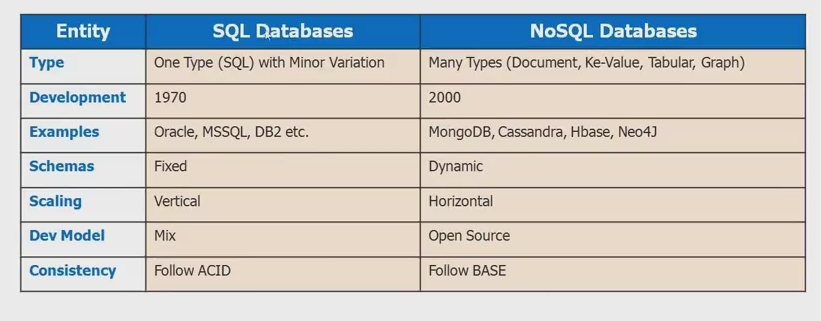

In [1]:
from IPython.display import Image 
Image(filename='images/sql_and_nosql_comparison.png')

### Relational Database (SQL) ###

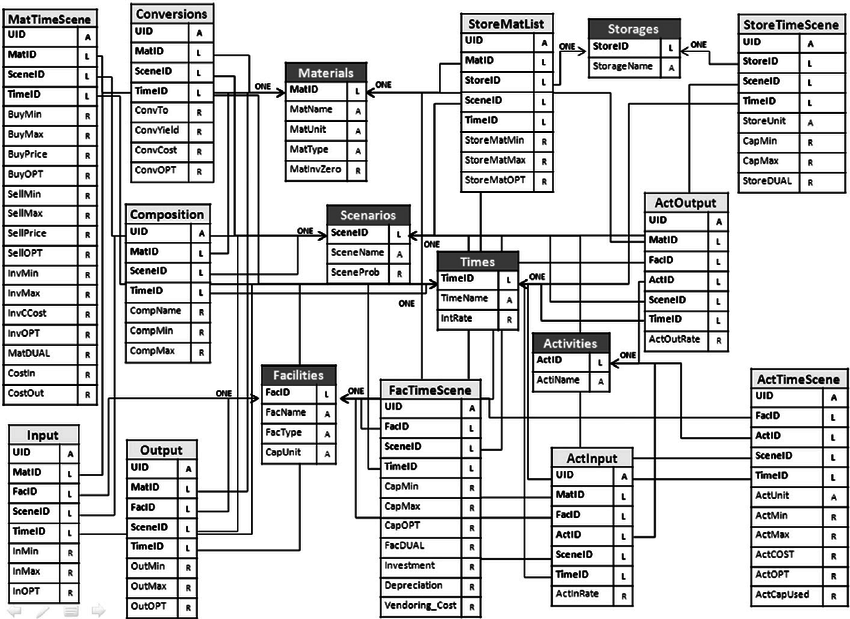

In [2]:
from IPython.display import Image 
Image(filename='images/relational_database.png')

### Key-value Database (NoSQL) ###

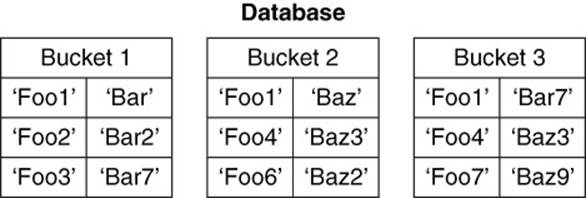

In [4]:
from IPython.display import Image 
Image(filename='images/key-value.jpg')

### MongoDB ###
[MongoDB](https://realpython.com/blog/python/introduction-to-mongodb-and-python/) is a NoSQL, open-source database. MongoDB stores its data in documents using JSON structure. Data is very flexible and not require a schema.

[Story](http://www.ithome.com.tw/news/116651)

### LevelDB ###
A fast key-value storage library written at Google

In [5]:
!pip install leveldb

    Complete output from command python setup.py egg_info:
    Don't know how to compile leveldb for Windows!
    
    ----------------------------------------


Command "python setup.py egg_info" failed with error code 1 in C:\Users\User\AppData\Local\Temp\pip-build-0ko_0ir_\leveldb\


#### Install on Windows ####
A Visual Studio project to build leveldb python wrapper

https://github.com/happynear/py-leveldb-windows

可compiler 亦有 [binary file](https://drive.google.com/open?id=0B0OhXbSTAU1HLWFpS0NjcmZFZm8)可下載

將 leveldb.pyd 放入 YOUR_PYTHON_ROOT/Lib/site-packages

#### Install on Linux ####

``` bash
# error: command 'x86_64-linux-gnu-gcc' failed with exit status 1

$ sudo apt-get install python-dev
$ sudo apt-get install leveldb
```

#### Install on Mac OS #### 
``` bash
$ pip3 install leveldb
```

### Insert and Query ###

``` Python
import leveldb

db = leveldb.LevelDB("./test.db")

key = b"Paul"    #"paul".encode('ascii')
value = b"10000" #"10000".encode('ascii')

db.Put(key, value)

print("Get from db: ", (db.Get(key)).decode('utf-8'))
```
#### Execute it! ####
``` bash
$ python test_rw.py
Get from db:  10000
```

### Create Database ###
``` Python
leveldb.LevelDB("./test.db")
```
``` bash
$ ls -al test.db/
total 40
drwxr-xr-x 2 pi pi 4096 Sep  6 11:35 .
drwxr-xr-x 4 pi pi 4096 Sep  6 11:35 ..
-rw-r--r-- 1 pi pi  120 Sep  6 11:33 000005.ldb
-rw-r--r-- 1 pi pi  121 Sep  6 11:34 000008.ldb
-rw-r--r-- 1 pi pi  121 Sep  6 11:35 000011.ldb
-rw-r--r-- 1 pi pi   31 Sep  6 11:35 000012.log
-rw-r--r-- 1 pi pi   16 Sep  6 11:35 CURRENT
-rw-r--r-- 1 pi pi    0 Sep  6 11:20 LOCK
-rw-r--r-- 1 pi pi  291 Sep  6 11:35 LOG
-rw-r--r-- 1 pi pi  289 Sep  6 11:34 LOG.old
-rw-r--r-- 1 pi pi  142 Sep  6 11:35 MANIFEST-000010
```

### Insert ###

leveldb.LevelDB.Put(key, value)


### Query ###

leveldb.levelDB.Get(key)


### Full Database Access ###

``` Python
import leveldb

# converting functions
def cvt_to_bytes(string):
    # leave type check for system exceptions
    return string.encode('ascii')


def cvt_to_string(bytestring):
    # leave type check for system exceptions
    return bytestring.decode('utf-8')


def cvt_b(key, value):
    key_b = key
    value_b = value
    if isinstance(key, str):
        key_b = cvt_to_bytes(key)
    if isinstance(value, str):
        value_b = cvt_to_bytes(value)
    return key_b, value_b


def cvt_s(key, value):
    key_s = key
    value_s = value
	
    if isinstance(key, (bytes, bytearray)):
        key_s = cvt_to_string(key)
    if isinstance(value, (bytes, bytearray)):
        value_s = cvt_to_string(value)
    return key_s, value_s


# database functions
def init(filename):
    db = leveldb.LevelDB(filename)
    return db


def insert(db, key, value):
    key_b, name_b = cvt_b(key, value)
    db.Put(key_b, name_b)

    
def delete(db, key):
    key_b = cvt_to_bytes(key)
    db.Delete(key_b)

    
def update(db, key, value):
    key_b, name_b = cvt_b(key, value)
    db.Put(key_b, name_b)

    
def search(db, key):
    key_b = cvt_to_bytes(key)
    value = db.Get(key_b)
    value_str = cvt_to_string(value)
    return value_str


def dump(db):
    for key, value in db.RangeIter():
        key_s, value_s = cvt_s(key, value)
        print (key_s, value_s)
```

### How to use ###
``` Python
import os

if __name__ =='__main__':

    db = init('test_all.db')

    print("Insert 2 new items")
    insert(db, 'Paul', 'Broadmission')
    insert(db, 'Bob', 'Broadmission')
    dump(db)
    print("\n")

    print("Delete the item where key = Paul")
    delete(db, 'Paul')
    dump(db)
    print("\n")

    print("Update the item where key = Bob")
    update(db, 'Bob', 'Microsoft')
    dump(db)
    print("\n")

    print("Query the item whose name = Bob")
    company = search(db, 'Bob')
    print(company)
    print("\n")

    os.system("rm -rf test_all.db")
```